# python package: lcapy

1. [lcapy/docs/netlist](https://lcapy.readthedocs.io/en/latest/netlists.html)
2. [lcapy/docs/schematics](https://lcapy.readthedocs.io/en/latest/schematics.html)

## Installation

```bash
sudo apt install ghostscript texlive-latex-extra cm-super
```

```
pip install lcapy
```

In [55]:
import subprocess

def run_shell(cmd: str):
    process = subprocess.Popen(
        cmd,
        stderr=subprocess.PIPE,
        stdout=subprocess.PIPE,
        text = True,
        shell=True
    )

    stdout, stderr = process.communicate()
    if stderr:
        print(stderr)
    if stdout:
        print(stdout)

run_shell('ls -al')

total 148
drwxrwxrwx+ 2 codespace codespace   4096 Nov  5 01:07 .
drwxrwxrwx+ 6 codespace root        4096 Nov  5 01:11 ..
-rw-rw-rw-  1 codespace codespace 143177 Dec  8 21:09 pylcapy.ipynb



## Examples

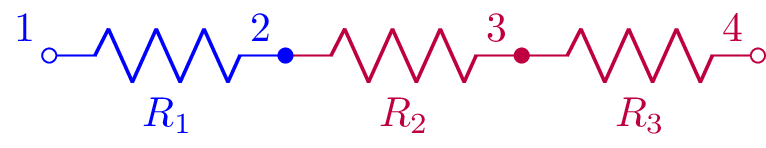

In [56]:
from lcapy import Circuit
cct = Circuit("""
R1 1 2; right
R2 2 3; right
R3 3 4; right""")

cct.annotate('R1', color='blue').annotate(cct.in_series('R1'), color='purple').draw()

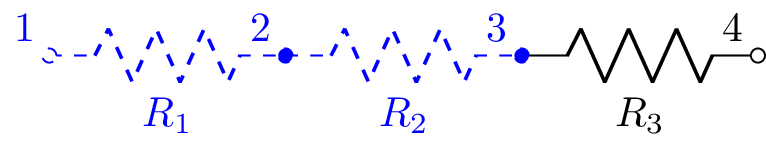

In [57]:
cct.annotate(('R1','R2'),'dashed, color=blue').draw()

In [58]:
a = Circuit("""
P1 1 0
R1 1 2
R2 2 0
R3 2 3
P2 3 0""")
display(a.voltage_gain(1, 0, 3, 0))

display(a.current_gain('P1', 'P2'))

display(a.transimpedance('P1', (3, 0)))
tpz = a.twoport('P1', 'P2', model='Z')
tpz.voltage_gain

  R₂   
───────
R₁ + R₂

 -R₂   
───────
R₂ + R₃

R₂

  R₂   
───────
R₁ + R₂

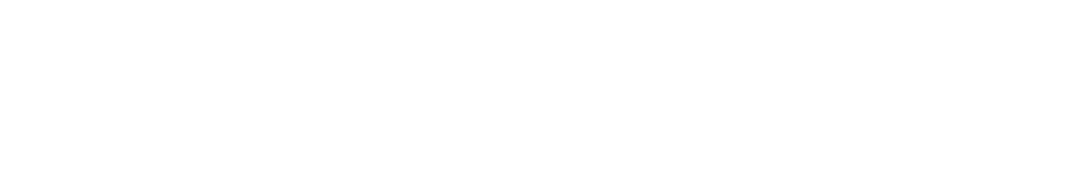

In [59]:
# bipole: label branch voltages
res_cct =  Circuit("""
R1 1 2 10K; right=1.5, v=V_1, label_style=aligned
R2 2 3 5k; right=1.5, v^=V_2, label_style=split
R3 3 4 2k; right=1.5, v_=V_3, label_style=name, label_flip=true
; label_nodes=none, draw_nodes=none, bipole voltage style={color=blue}, color=white
""")

res_cct.draw()

## RC

1. [lcapy/schematics](https://lcapy.readthedocs.io/en/latest/schematics.html)

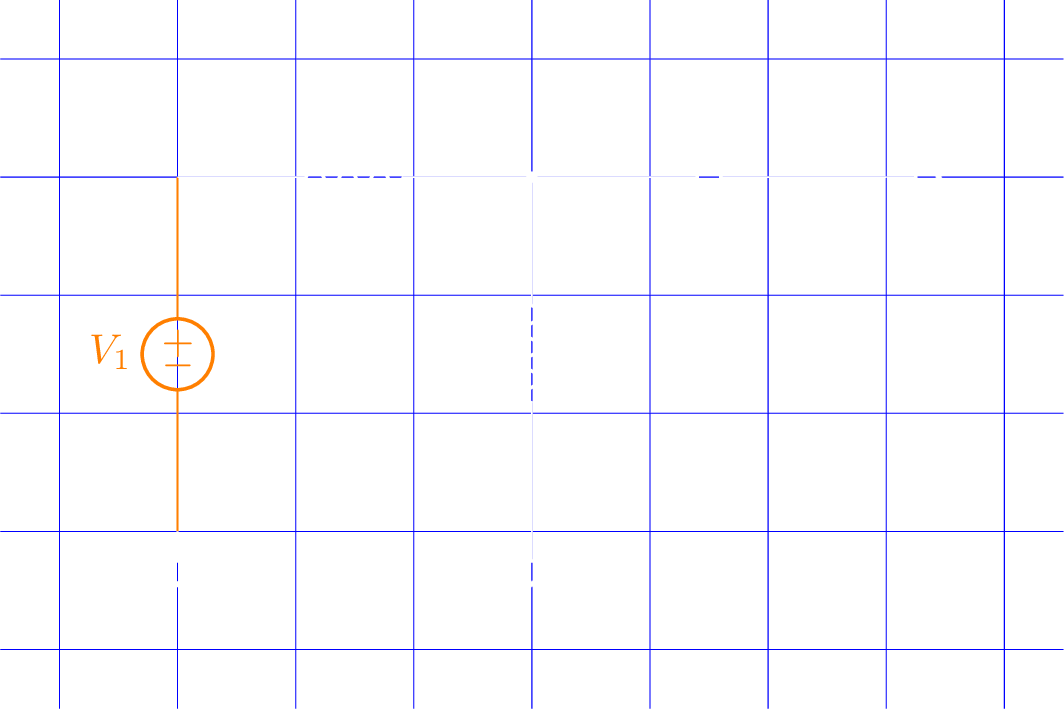

In [60]:
rc_lpf = Circuit("""
                 ; def elem={color=red}
                 ; def highlight={color=red, thick}
                 V1 vin 0; down, color=orange
                 R1 vin vout; v=V_1, bipole voltage style={color=blue}
                 R2 vout 0; down, v=V_2, bipole voltage style={color=blue}
                 C2 vout 0; highlight
                 ; draw_nodes=connections, label_ids=false, label_nodes=none, autoground=true, node_spacing=3, cpt_size=1, help_lines=1, color=white
                 ; bipole label style={color=red}

                 """)
rc_lpf.draw()

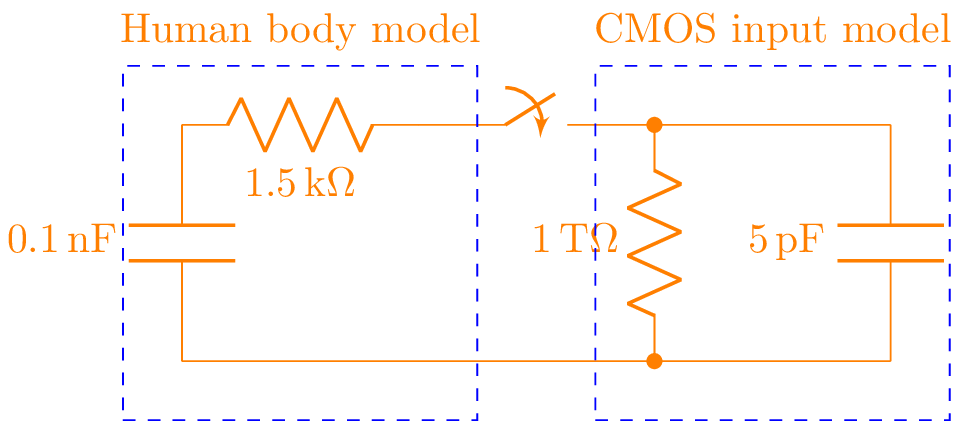

In [61]:
# RC
rc_cct2 = Circuit("""
C1 1 0 100e-12;down
R1 1 6 1500;right
R2 2 4 1e12;down
C2 3 5 5e-12;down
W 2 3;right
W 0 4;right
W 4 5;right
SW 6 2 no;right, l=
;;\\node[blue,draw,dashed,inner sep=5mm,anchor=north, fit=(1) (6) (0), label=Human body model] {};
;;\\node[blue,draw,dashed,inner sep=5mm, fit=(2) (3) (4) (5), label=CMOS input model]{};
;draw_nodes=connections, label_nodes=False, label_ids=False, color=orange
""")

rc_cct2.draw()

## Inverting OpAmp

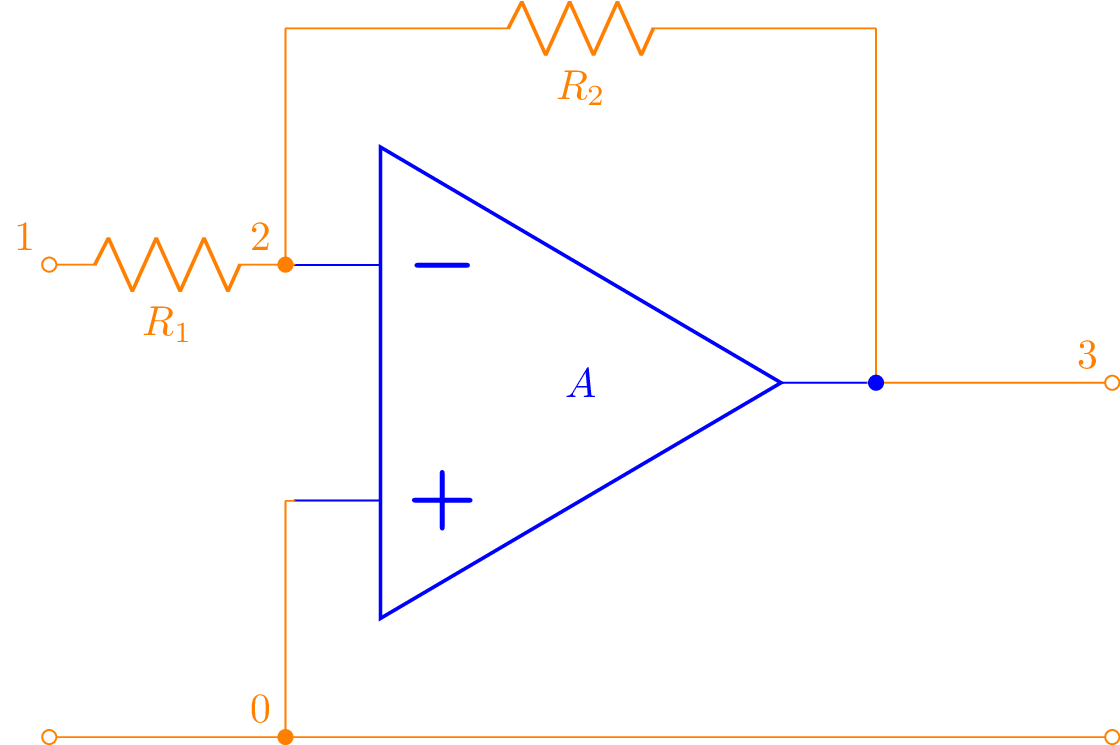

In [62]:
opamp_cct = Circuit("""
P1 1 0_1; down
R1 1 2; right
R2 2_1 3_1; right
E1 3_2 0_3 opamp 2_0 2 A; mirror, color=blue
W 0_1 0; right
W 2_0 0; down
W 3_2 3; right
W 0 0_3; right
P2 3 0_3; down
W 2_1 2; down
W 3_1 3_2; down
; draw_nodes=connections, color=orange
""")
opamp_cct.draw()

## Integrator

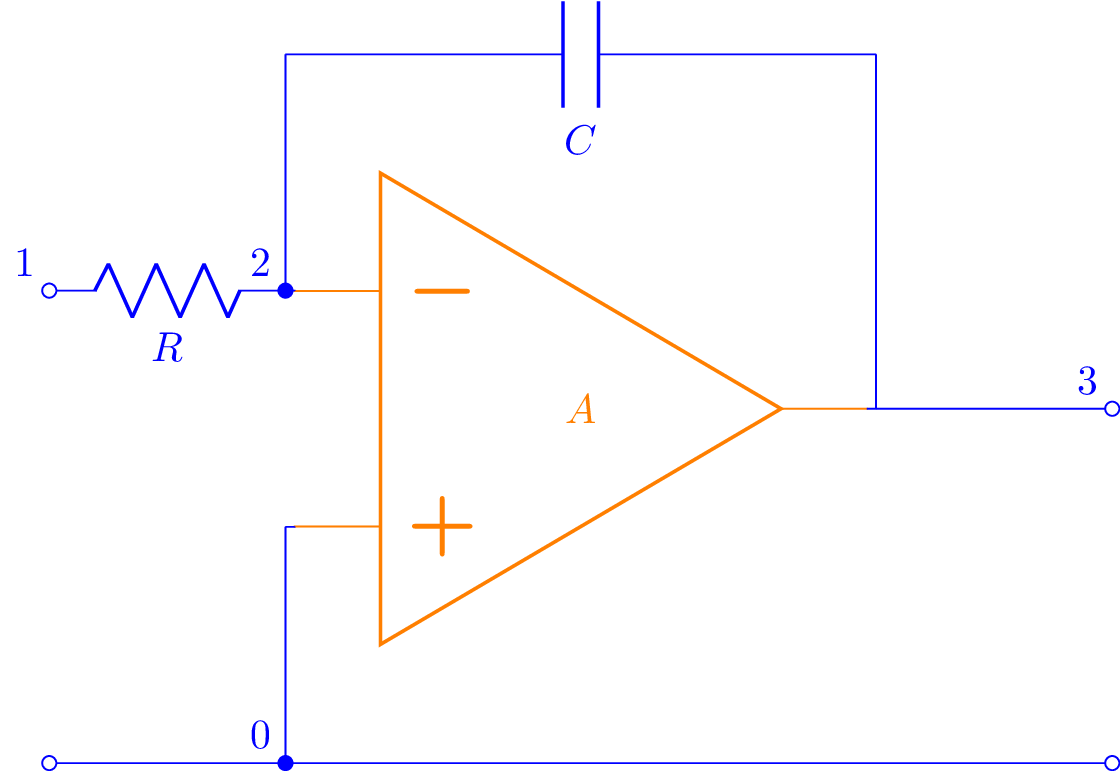

In [74]:
integ_cct = Circuit("""
P1 1 0_1; down
R 1 2; right
C 2_1 3_1; right
E1 3_2 0_3 opamp 2_0 2 A; mirror, color=orange
W 0_1 0; right
W 2_0 0; down
W 3_2 3; right
W 0 0_3; right
P2 3 0_3; down
W 2_1 2; down
W 3_1 3_2; down
;color=blue
""")

integ_cct.draw()

## CMOS Inverter


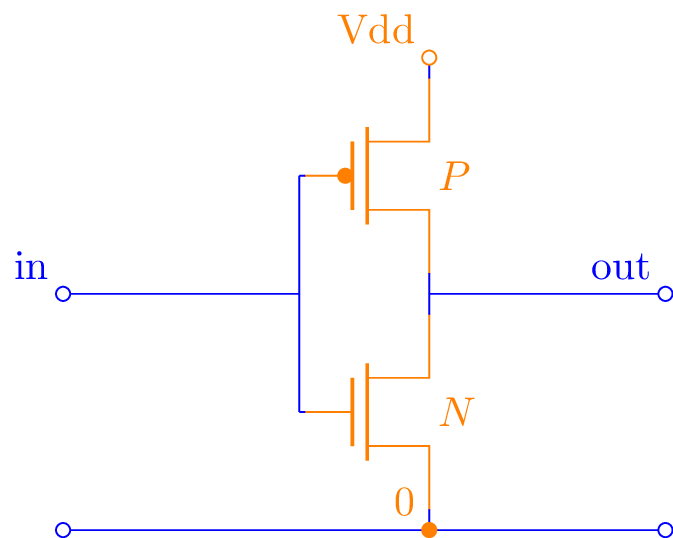

In [ ]:
inv_cct = Circuit("""
M1 3_c 2_p Vdd pmos P; right, color=orange
M2 3_c 2_n 0 nmos N; right, color=orange
W 2_p 2_c; down=0.5
W 2_c 2_n; down=0.5
W in 2_c; right
W 3_c out; right
P1 in 0_2; down
P2 out 0_3; down
W 0_2 0;right
W 0 0_3;right
;color=blue
""")

inv_cct.draw()

## Sallen Key Filter

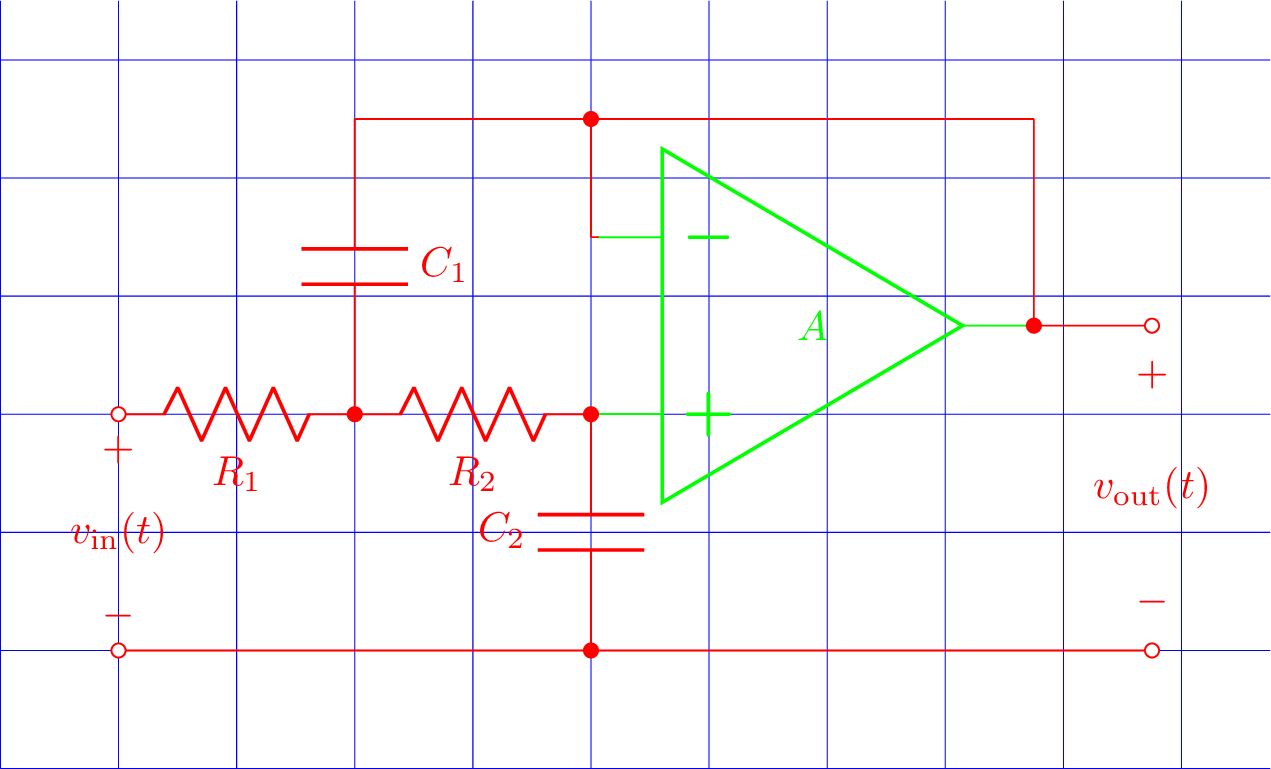

In [71]:
sallen_filt_cct = Circuit("""
P 1 0; down, v_=v_{in}(t)
R1 1 2; right
R2 2 3; right
C1 2 4; up
C2 3 9; down
W 4 5; right
W 5 6; right
W 6 7; down=0
W 7 8; right=0.5
E 7 0 opamp 3 11 A; right, mirror, scale=0.75, size=0.75, color=green
W 5 11; down=0.5
P 8 10; down, v^=v_{out}(t)
W 0 9; right
W 9 10; right
;draw_nodes=connections, label_nodes=False, help_lines=1, color=red
""")

sallen_filt_cct.draw()

## Pierce Oscillator

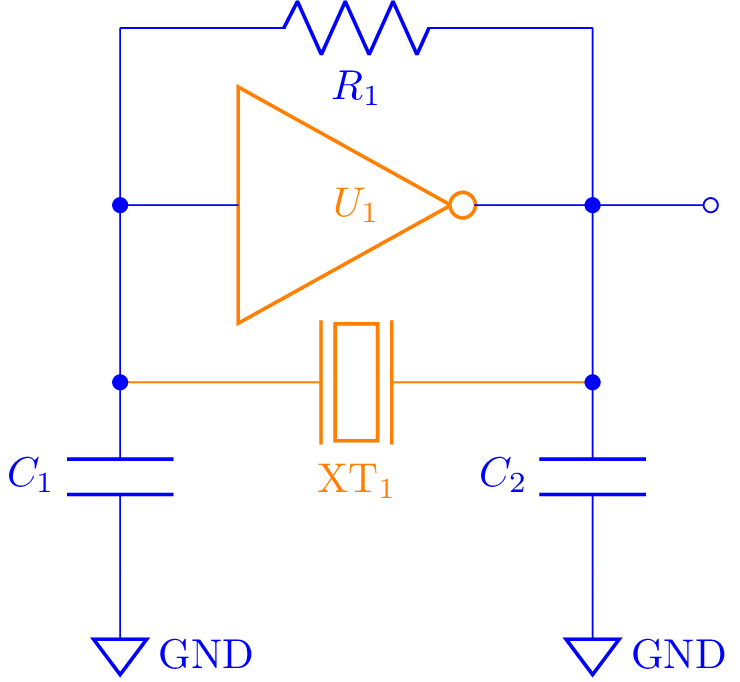

In [65]:
pierce_osc_cct = Circuit("""
U1 inverter; right, color=orange
W 5 U1.in; right=0.5
W U1.out 6; right=0.5
W 6 9; right=0.5
R1 7 8; right
W 5 1; down=0.75
W 6 2; down=0.75
W 5 7; up=0.75
W 6 8; up=0.75
XT1 1 2; right, color=orange
C1  1 4; down=0.8
C2  2 3; down=0.8
W 4 0; down=0.1, implicit, l=GND
W 3 0; down=0.1, implicit, l=GND
; draw_nodes=connections, label_nodes=False, color=blue
""")

pierce_osc_cct.draw()